In [1]:
from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa, sexa2deg
import astropy.units as u

Abrindo o cubo de dados já cortado e plotando a imagem.
Exibindo também as informações do cubo.

[INFO] 577 x 30 x 30 Cube (corte.fits)
[INFO] .data(577 x 30 x 30) (1e-20 erg / (Angstrom cm2 s)), .var(577 x 30 x 30)
[INFO] center:(-38:10:35.3169,13:43:33.3078) size:(6.000",6.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4780.17 max:5500.17 step:1.25 Angstrom


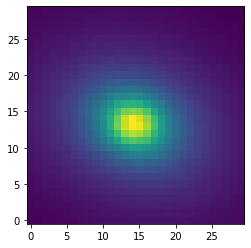

In [8]:
cube = Cube('corte.fits')
cube.info()
image = cube.sum(axis=0)
image.plot()

Aqui, ao invés de criar um novo cubo binado, vamos extrair apenas os espectros que seriam obtidos do cubo binnado.
A estratégia é: como queremos binnar em 0.6arcsec/px e temos 0.2arcsec/px do cubo original, precisamos somar a contribuição de 3px X 3px (0.6/0.2). Por esse motivo, nosso contador é incrementado de 3 em 3.
Temos dois loops. Para cada valor de y, binnados todos os valores em x. Então saímos do loop em x, atualizamos y em 3, zeramos o contador de x e repitimos as iterações. Isso ocorre até percorremos todo o grid de pixels.
O método de extração funciona da seguinte forma:
A cada iteração é como se extraíssimos um subcubo de tamanho espacial 3X3. Feito isso, extríamos o espectro somando a contribuição dos nove pixels que formam esse subcubo. O método é a soma pois estamos querendo aumentar a razão sinal ruído.

x_px é o posição x do pixel i.
y_px é a posição x do pixel i.
x e y são contadores.
Cada espectro binnado será salvo com o nome **y_px X x_px.fits**, que indica a posição do espectro neste novo grid binnado. O espectro é salvo na pasta **Espectros**.

In [29]:
x =0
y = 0
x_px = 0
y_px = 0
while y <30:
    while x < 30:
        sub_cub = cube[:,0+y:3+y,0+x:3+x]
        spc = sub_cub.sum(axis=(1,2))
        spc.write('/home/carlosmelo/Documents/Projeto/Testes com o mpdaf/ESO/Espectros/%dX%d.fits'%(y_px,x_px))
        x_px = x_px + 1
        x = x +3
        
    y = y + 3
    x = 0
    x_px = 0
    y_px = y_px + 1
    

Alguns testes para verificar se os 'sub-cubos' extraídos estão corretos.

In [35]:
test = cube[:,27:30,27:30]
test[0,0,0]


157.1531982421875

In [14]:
print(0+y,'-',3+y,'|',0+x,'-',3+x)

0 - 2 | 10 - 13


In [28]:
cube[0,29,29]

100.66580963134766

In [36]:
sub_cub[0,0,0]

157.1531982421875